In [ ]:
from wayne_utils import load_data, save_data
import os
import numpy as np
import pandas as pd

_ROOT_PATH = ".../TST"

_dynamic_data_path = os.path.join( _ROOT_PATH, "data/CPL/dynamic")

## 1 将标签展平

In [2]:
def flatten( count_list ):
    save_list = []
    for i in range( len(count_list)):
        temp_dict = {}
        try:
            labels = count_list[str(i)]
        except:
            labels = count_list[ i ]
        for key in ['法院', '原告', '被告']:
            temp_dict[key] = labels[key]
        for entity in ['法院', '原告']:
            for key in labels["事实"][entity]:
                prefix = "原告诉称" if entity == "原告" else "法院裁定"
                temp_dict[ f"{prefix}_{key}"] = labels["事实"][entity][key]
        save_list.append( temp_dict )
    return save_list

label_count_path = os.path.join( _dynamic_data_path, "count_tables_train_dynamic.json")
label_count_list = load_data( label_count_path, "json" )
save_list = flatten( label_count_list )
save_data( save_list, os.path.join(_ROOT_PATH, "evaluation/CountCPL/label_count_list_train.json"))

## 2 标签统计

In [9]:
all_stat = {}
for key in save_list[0].keys():
    all_stat[key] = {}
for i in range(len(save_list)):
    labels = save_list[i]
    for key in labels:
        value = labels[key]
        if value not in all_stat[key]:
            all_stat[key][value] = 0
        all_stat[key][value] += 1
    
max_count = 0
for key in all_stat.keys():
    for subkey in all_stat[key]:
        if subkey > max_count:
            max_count = subkey
for key in all_stat.keys():
    for i in range(6):
        if i not in all_stat[key]:
            all_stat[key][i] = 0
all_stat

{'法院': {1: 492, 0: 0, 2: 0, 3: 0, 4: 0, 5: 0},
 '原告': {1: 479, 2: 12, 4: 1, 0: 0, 3: 0, 5: 0},
 '被告': {1: 277, 2: 157, 3: 41, 4: 8, 5: 6, 8: 2, 6: 1, 0: 0},
 '法院裁定_借款凭证': {1: 301, 2: 85, 5: 3, 3: 25, 0: 76, 4: 1, 7: 1},
 '法院裁定_约定的借款金额': {1: 361, 2: 57, 3: 17, 0: 55, 4: 2, 5: 0},
 '法院裁定_约定的还款日期或借款期限': {0: 212, 1: 243, 3: 6, 2: 31, 4: 0, 5: 0},
 '法院裁定_约定的利息': {1: 213, 0: 259, 2: 17, 3: 3, 4: 0, 5: 0},
 '法院裁定_约定的逾期利息': {0: 422, 1: 69, 2: 1, 3: 0, 4: 0, 5: 0},
 '法院裁定_约定的违约金': {0: 433, 1: 58, 2: 1, 3: 0, 4: 0, 5: 0},
 '原告诉称_借款凭证': {1: 246, 0: 186, 2: 46, 3: 13, 4: 1, 5: 0},
 '原告诉称_约定的借款金额': {1: 322, 0: 112, 5: 2, 2: 41, 3: 14, 4: 1},
 '原告诉称_约定的还款日期或借款期限': {0: 262, 1: 207, 2: 21, 3: 2, 4: 0, 5: 0},
 '原告诉称_约定的利息': {1: 179, 0: 295, 2: 14, 3: 3, 4: 1, 5: 0},
 '原告诉称_约定的逾期利息': {0: 451, 1: 41, 2: 0, 3: 0, 4: 0, 5: 0},
 '原告诉称_约定的违约金': {0: 450, 1: 42, 2: 0, 3: 0, 4: 0, 5: 0}}

In [6]:
ZH_EN_map = {
    '法院': "Court",
    '原告': "Plaintiff",
    '被告': "Defendant",
    '法院裁定_借款凭证': "Court Judges: Lending Evidence",
    '法院裁定_约定的借款金额': "Court Judges: Agreed Lending Amount",
    '法院裁定_约定的还款日期或借款期限': "Court Judges: Agreed Repayment Date",
    '法院裁定_约定的利息': "Court Judges: Agreed Interest",
    '法院裁定_约定的逾期利息': "Court Judges: Agreed Overdue Interest",
    '法院裁定_约定的违约金': "Court Judges: Agreed Liquidated Damages",
    '原告诉称_借款凭证': "Plaintiff claims: Lending Evidence",
    '原告诉称_约定的借款金额': "Plaintiff claims: Agreed Lending Amount",
    '原告诉称_约定的还款日期或借款期限': "Plaintiff claims: Agreed Repayment Date",
    '原告诉称_约定的利息': "Plaintiff claims: Agreed Interest",
    '原告诉称_约定的逾期利息': "Plaintiff claims: Agreed Overdue Interest",
    '原告诉称_约定的违约金': "Plaintiff claims: Agreed Liquidated Damages",
}
EN_all_stat ={}
for key in all_stat.keys():
    EN_all_stat[ZH_EN_map[key]] = all_stat[key]

In [10]:
EN_all_stat

{'Court': {1: 492, 0: 0, 2: 0, 3: 0, 4: 0, 5: 0},
 'Plaintiff': {1: 479, 2: 12, 4: 1, 0: 0, 3: 0, 5: 0},
 'Defendant': {1: 277, 2: 157, 3: 41, 4: 8, 5: 6, 8: 2, 6: 1, 0: 0},
 'Court Judges: Lending Evidence': {1: 301,
  2: 85,
  5: 3,
  3: 25,
  0: 76,
  4: 1,
  7: 1},
 'Court Judges: Agreed Lending Amount': {1: 361,
  2: 57,
  3: 17,
  0: 55,
  4: 2,
  5: 0},
 'Court Judges: Agreed Repayment Date': {0: 212,
  1: 243,
  3: 6,
  2: 31,
  4: 0,
  5: 0},
 'Court Judges: Agreed Interest': {1: 213, 0: 259, 2: 17, 3: 3, 4: 0, 5: 0},
 'Court Judges: Agreed Overdue Interest': {0: 422,
  1: 69,
  2: 1,
  3: 0,
  4: 0,
  5: 0},
 'Court Judges: Agreed Liquidated Damages': {0: 433,
  1: 58,
  2: 1,
  3: 0,
  4: 0,
  5: 0},
 'Plaintiff claims: Lending Evidence': {1: 246,
  0: 186,
  2: 46,
  3: 13,
  4: 1,
  5: 0},
 'Plaintiff claims: Agreed Lending Amount': {1: 322,
  0: 112,
  5: 2,
  2: 41,
  3: 14,
  4: 1},
 'Plaintiff claims: Agreed Repayment Date': {0: 262,
  1: 207,
  2: 21,
  3: 2,
  4: 0,


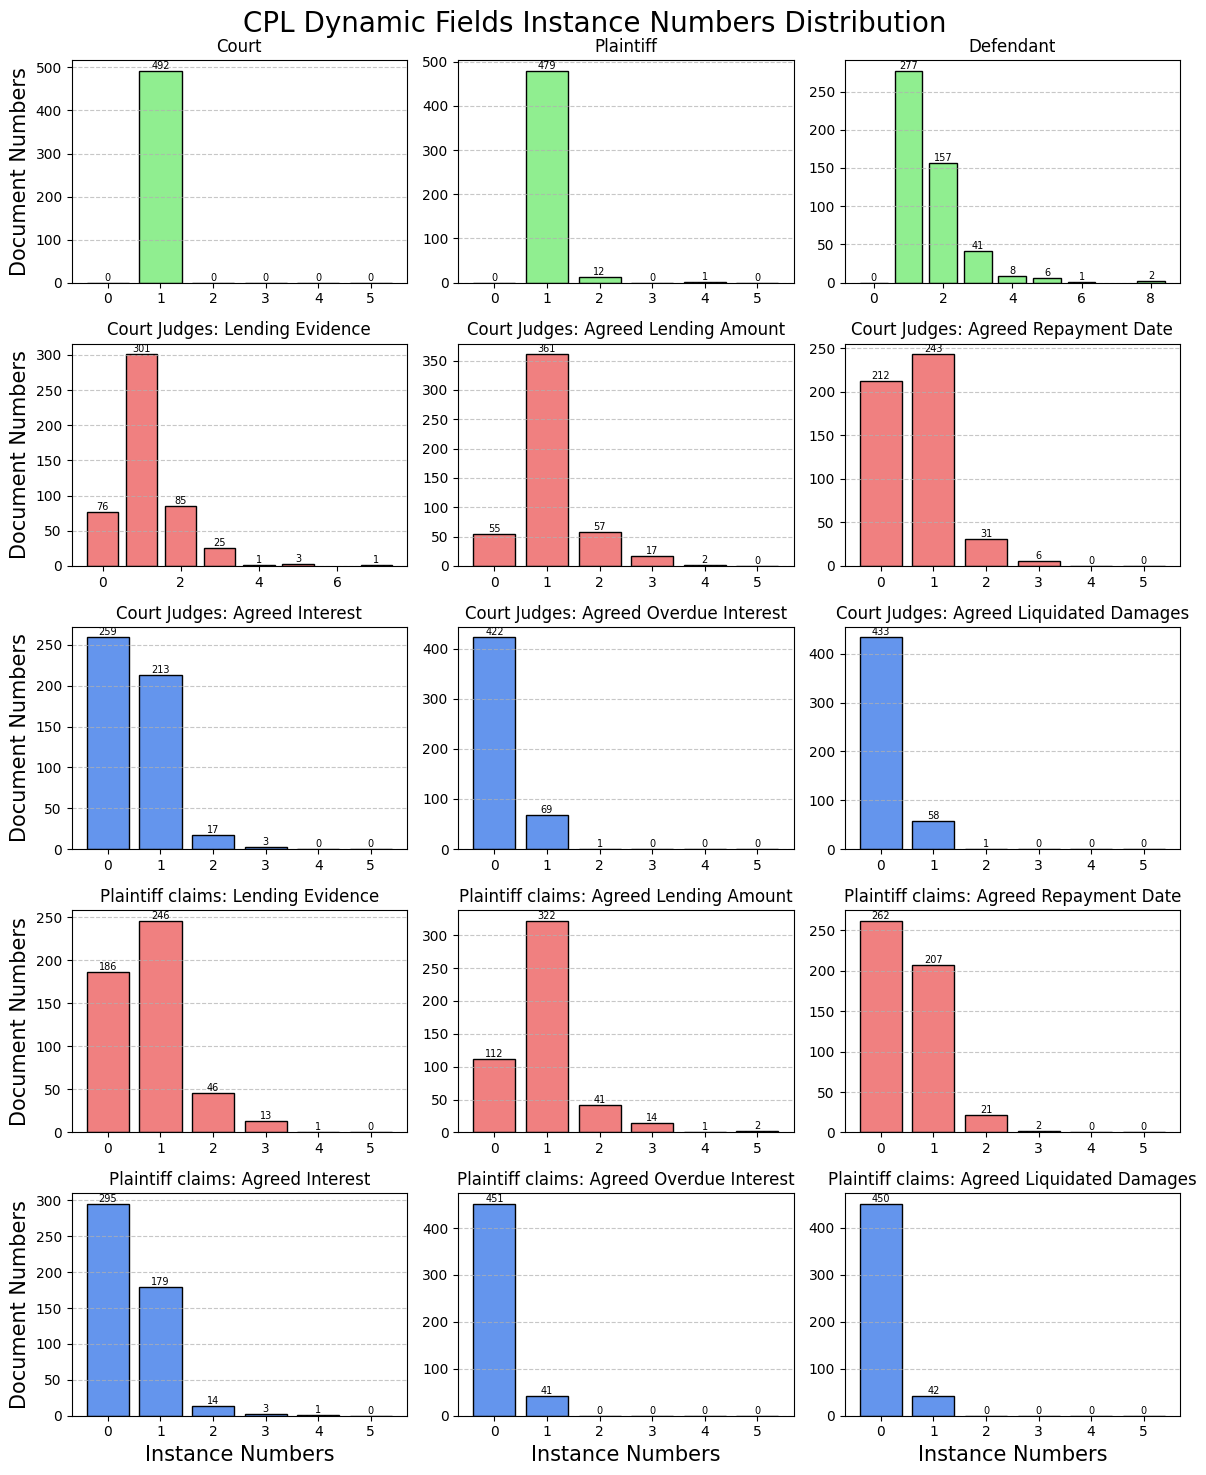

In [11]:
import matplotlib.pyplot as plt

data = EN_all_stat
# 设置图表的大小和子图
num_fields = len(data)
cols = 3
rows = (num_fields + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(12, 3 * rows))
axes = axes.flatten()
fig.suptitle(f'CPL Dynamic Fields Instance Numbers Distribution', fontsize=20)
# 绘制每个字段的柱状图
for idx, (field, counts) in enumerate(data.items()):
    x = list(counts.keys())
    y = list(counts.values())
    if idx <3:
        color = "lightgreen"
    elif idx <6:
        color = "lightcoral"
    elif idx < 9:
        color = "cornflowerblue"
    elif idx <12:
        color = "lightcoral"
    else:
        color = "cornflowerblue"
    bars = axes[idx].bar(x, y, color=color, edgecolor='black')
    axes[idx].set_title(field, fontsize=12)
    if idx > 11:
        axes[idx].set_xlabel('Instance Numbers', fontsize=15)
    if idx % 3==0:
        axes[idx].set_ylabel('Document Numbers', fontsize=15)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
    # 在柱状图上添加数值
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(
            bar.get_x() + bar.get_width() / 2,  # 横坐标
            height,  # 纵坐标
            f'{int(height)}',  # 数值
            ha='center', va='bottom', fontsize=7  # 字体对齐方式和大小
        )
# 删除多余的子图
for ax in axes[num_fields:]:
    ax.axis('off')

plt.tight_layout()
plt.savefig('DynamicInstanceNumbers.pdf', dpi=600, bbox_inches='tight',format="pdf")
plt.show()


## 3 从预测结果构建统计数据

In [8]:
def count_from_predict( predict_dict ):
    empty_dict = {
        '法院': 0,
        '原告': 0,
        '被告': 0,
        '事实': {
            '原告': {
                '借款凭证': 0,
                '约定的借款金额': 0,
                '约定的还款日期或借款期限': 0,
                '约定的利息': 0,
                '约定的逾期利息': 0,
                '约定的违约金': 0
            },
            '法院': {
                '借款凭证': 0,
                '约定的借款金额': 0,
                '约定的还款日期或借款期限': 0,
                '约定的利息': 0,
                '约定的逾期利息': 0,
                '约定的违约金': 0
            }
        }
    }
    for item in predict_dict:
        try:
            entity_type, field, value = item[0], item[1], item[2]
        except:
            raise Exception( f"{item}")
        if field == "姓名名称":
            empty_dict[ entity_type ] += 1
        else:
            for key in ['借款凭证', '约定的借款金额', '约定的还款日期或借款期限', '约定的利息', '约定的逾期利息', '约定的违约金']:
                if key in field:
                    empty_dict[ '事实' ][ entity_type ][key] += 1
    return empty_dict

In [31]:
zero_label = {
    '法院': 0,
    '原告': 0,
    '被告': 0,
    '法院裁定_借款凭证': 0,
    '法院裁定_约定的借款金额': 0,
    '法院裁定_约定的还款日期或借款期限': 0,
    '法院裁定_约定的利息': 0,
    '法院裁定_约定的逾期利息': 0,
    '法院裁定_约定的违约金': 0,
    '原告诉称_借款凭证': 0,
    '原告诉称_约定的借款金额': 0,
    '原告诉称_约定的还款日期或借款期限': 0,
    '原告诉称_约定的利息': 0,
    '原告诉称_约定的逾期利息': 0,
    '原告诉称_约定的违约金': 0
}

one_label = {
    '法院': 1,
    '原告': 1,
    '被告': 1,
    '法院裁定_借款凭证': 1,
    '法院裁定_约定的借款金额': 1,
    '法院裁定_约定的还款日期或借款期限': 1,
    '法院裁定_约定的利息': 1,
    '法院裁定_约定的逾期利息': 1,
    '法院裁定_约定的违约金': 1,
    '原告诉称_借款凭证': 1,
    '原告诉称_约定的借款金额': 1,
    '原告诉称_约定的还款日期或借款期限': 1,
    '原告诉称_约定的利息': 1,
    '原告诉称_约定的逾期利息': 1,
    '原告诉称_约定的违约金': 1
}

In [ ]:
from evaluate import Eval
model_list = [
    "ChatGLM3-6B",
    "Qwen1.5-7B-Chat",
    "Chinese-Mistral-7B-Instruct-v0.1",
    "Baichuan2-7B-Chat",
    "Qwen2.5-0.5B",
    
    "ChatGLM3-6B-static4dynamicbaseline-3epoches",
    "CPL_static4baseline_Qwen1.5-7B-Chat-1epoch",
    "CPL_static4baseline_Chinese-Mistral-7B-Instruct-v0.1-1.5epoch",

    "gpt4",
    "all_one",
    "all_zero"
    
]
# 全0，1，GPT，静态方法评估
version_dir = os.path.join( _ROOT_PATH, "test/CPL_static/v2_dynamic_baseline")
for model_name in model_list[-3:-2]:
    if model_name == "all_zero":
        predict_count_list = [ zero_label for _ in range(len(predict_count_list))]
    elif model_name == "all_one":
        predict_count_list = [ one_label for _ in range(len(predict_count_list))]
    else:
        if model_name == "gpt4":
            predict_lists = load_data( os.path.join( version_dir, "predict_lists_gpt4o_filter.pickle"), "pickle")
        else:
            predict_lists = load_data( os.path.join( version_dir, f"predict_lists_filter_{model_name}.pickle"), "pickle")
        if len( predict_lists ) == 2:
            predict_lists = predict_lists[1]
        predict_count_list = []
        for index in range( len(predict_lists)):
            ret_dict = count_from_predict( predict_lists[ index ] )
            predict_count_list.append( ret_dict )

        save_list = flatten( predict_count_list )
        save_data( save_list, os.path.join(_ROOT_PATH, "evaluation/CountCPL/predict_count_list.json"))
        
        predict_count_list = load_data( os.path.join(_ROOT_PATH, "evaluation/CountCPL/predict_count_list.json"), "json" )
    label_count_list = load_data( os.path.join(_ROOT_PATH, "evaluation/CountCPL/label_count_list_test.json"), "json" )
    aadf, error_rate = Eval( predict_count_list, label_count_list )
    print( model_name )
    print( aadf.describe().loc["mean"])

test 211 tables for sss
Error rate = 0.47393364928909953 52.29067930489732 88.78357030015798 56.52448657187994
gpt4
Easy-RMSE       0.005804
Easy-MAE        0.002370
Easy-EM        50.236967
Medium-RMSE     1.032818
Medium-MAE      0.550553
Medium-EM      76.145340
Hard-RMSE       1.488955
Hard-MAE        0.925355
Hard-EM        94.391785
AVG-RMSE        1.184870
AVG-MAE         0.590837
AVG-EM         78.262243
Name: mean, dtype: float64
